<h1>PCA DE FORMA PRIMITIVA<h1>

<h3>IMPORTAÇÃO DE BBT<h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>CRIAÇÃO DE DADOS<h3>

In [3]:

#Data frame para estudo

Local=['nascente','nascente','nascente','nascente','area rural','area rural','area rural','area rural','area urbana','area urbana','area urbana','area urbana']
pH=[4.5,3.5,4.5,3.5,5.8,5.5,5,4.5,6.5,7,6.8,6]
N=[1.2,1.3,1.2,1.3,1.2,1.1,1.3,1.2,2.1,1.8,1.5,1.5]
Oxigen=[0.5,0.5,0.6,0.7,0.5,0.4,0.5,0.3,0.4,0.5,0.5,0.4]
MatOrg=[5.5,5.2,5.3,5.4,5.2,5.4,5.5,5.8,8.2,8.3,8.4,8.5]

dataraiz=pd.DataFrame()
dataraiz['pH']=pH
dataraiz['N']=N
dataraiz['Oxigen']=Oxigen
dataraiz['MatOrg']=MatOrg

dataraiz

,pH,N,Oxigen,MatOrg
0,4.5,1.2,0.5,5.5
1,3.5,1.3,0.5,5.2
2,4.5,1.2,0.6,5.3
3,3.5,1.3,0.7,5.4
4,5.8,1.2,0.5,5.2
5,5.5,1.1,0.4,5.4
6,5.0,1.3,0.5,5.5
7,4.5,1.2,0.3,5.8
8,6.5,2.1,0.4,8.2
9,7.0,1.8,0.5,8.3


<h3>NORMALIZAÇÃO DE VALORES POR SKLEARN<h3>

In [5]:
#Normalização dos Valores será feita por Biblioteca

from sklearn.preprocessing import StandardScaler

model=StandardScaler()
model.fit(dataraiz)
df=pd.DataFrame(model.transform(dataraiz),columns=dataraiz.columns)
df

,pH,N,Oxigen,MatOrg
0,-0.660270,-0.681500,0.169031,-0.639504
1,-1.530956,-0.325935,0.169031,-0.854665
2,-0.660270,-0.681500,1.183216,-0.782945
3,-1.530956,-0.325935,2.197401,-0.711225
4,0.471622,-0.681500,0.169031,-0.854665
5,0.210416,-1.037065,-0.845154,-0.711225
6,-0.224927,-0.325935,0.169031,-0.639504
7,-0.660270,-0.681500,-1.859339,-0.424344
8,1.081102,2.518588,-0.845154,1.296939
9,1.516445,1.451892,0.169031,1.368659


<h3>MATRIZ DE COVARIANCIA, CALCULO DE AUTOVALORES E AUTOVETORES<h3>

In [7]:
# não usaremos sklearn

#criar matriz de covariancia
#neste caso queremos uma matriz onde as linhas representem as variaveis, assim, cabe fazer  a transposta (.T)

covariancia=np.cov(df.T)
covariancia


array([[ 1.09090909,  0.68835925, -0.40004245,  0.87230034],
       [ 0.68835925,  1.09090909, -0.16937697,  0.8807569 ],
       [-0.40004245, -0.16937697,  1.09090909, -0.31850199],
       [ 0.87230034,  0.8807569 , -0.31850199,  1.09090909]])

In [11]:
#encontrar os autovalores e autovetores
from numpy import linalg

autovalores,autovetores=linalg.eig(covariancia)

autovalores

array([2.87040913, 0.14827796, 0.35947177, 0.98547751])

In [86]:
autovetores

array([[ 0.55215973,  0.52811835, -0.27854924,  0.58191147],
       [ 0.4043946 ,  0.44691671, -0.01762671, -0.79775921],
       [ 0.72861699, -0.63582204,  0.25454076,  0.00752429],
       [-0.02649384,  0.34217947,  0.92590962,  0.15780578]])

In [136]:
#são 4 variáveis, logo, 4 componentes/4 autovetores, 4 autovalores
#atenção, eles não estão em ordem!
#veja:

datavetor=pd.DataFrame(autovetores,index='componente1 componente2 componente3 componente4'.split(), columns=dataraiz.columns)

datavetor['autovalor']=autovalores

datavetor



,pH,N,Oxigen,MatOrg,autovalor
componente1,0.552160,0.528118,-0.278549,0.581911,2.870409
componente2,0.404395,0.446917,-0.017627,-0.797759,0.148278
componente3,0.728617,-0.635822,0.254541,0.007524,0.359472
componente4,-0.026494,0.342179,0.925910,0.157806,0.985478


In [87]:
#para ajustarmos a ordem, basta levar em conta o os maiores autovalores
datavetor.sort_values(by='autovalor',inplace=True,ascending=False)
datavetor

,pH,N,Oxigen,MatOrg,autovalor
componente1,0.552160,0.528118,-0.278549,0.581911,2.870409
componente4,-0.026494,0.342179,0.925910,0.157806,0.985478
componente3,0.728617,-0.635822,0.254541,0.007524,0.359472
componente2,0.404395,0.446917,-0.017627,-0.797759,0.148278


In [88]:
#podemos ainda representar o quanto o componente representa a variação
somaautovalor=autovalores.sum()
colunanova=[]
for valor in datavetor['autovalor'].values.tolist():
    colunanova.append((valor/somaautovalor)*100)
    
datavetor['% de dados representados']=colunanova
    
colunanova=[]
for valor in range(0,len(autovalores)):
    if valor==0:
        colunanova.append(datavetor.iloc[0,5])
    else:
        colunanova.append(float(datavetor.iloc[valor,5])+colunanova[valor-1])

datavetor['% de dados representados acumulada']=colunanova

datavetor

,pH,N,Oxigen,MatOrg,autovalor,% de dados representados,% de dados representados acumulada
componente1,0.552160,0.528118,-0.278549,0.581911,2.870409,65.780209,65.780209
componente4,-0.026494,0.342179,0.925910,0.157806,0.985478,22.583860,88.364069
componente3,0.728617,-0.635822,0.254541,0.007524,0.359472,8.237895,96.601963
componente2,0.404395,0.446917,-0.017627,-0.797759,0.148278,3.398037,100.000000


<h3>PROJEÇÃO DADOS MULTIPLICANDO POR AUTOVETORES E CRIAÇÃO DE GRÁFICO DE DISPERSÃO COM COMPONENTES<h3>

Text(0, 0.5, 'Component 2')

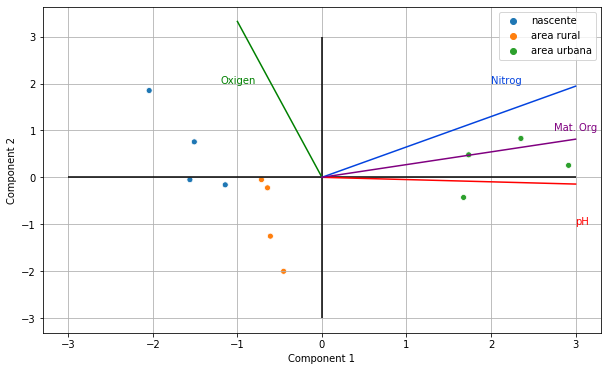

In [135]:
#projetar valores da matriz df
#escolhí o 1º e 4º autovetor da lista (possuem maior autovalores)

valoresprojetarX=df.dot(autovetores[0])

valoresprojetarY=df.dot(autovetores[3])


plt.figure(figsize=(10,6))
sns.scatterplot(valoresprojetarX,valoresprojetarY,hue=Local)


plt.grid()
plt.vlines(0,-3,3)
plt.hlines(0,-3,3)
           
#plotar retas das variáveis no gráfico           
#oxigen
xO=np.linspace(-1,0,20)

valueOXIG=datavetor.iloc[1,2]/datavetor.iloc[0,2]
plt.plot(xO,np.abs(valueOXIG*xO),c='g')
#pH
xP=np.linspace(0,3,20)

valuepH=datavetor.iloc[1,0]/datavetor.iloc[0,0]
plt.plot(xP,-np.abs(valuepH*xP),c='r')

#N
valueN=datavetor.iloc[1,1]/datavetor.iloc[0,1]
plt.plot(xP,np.abs(valueN*xP),c='#0343DF')

#Materia Org
valueM=datavetor.iloc[1,3]/datavetor.iloc[0,3]
plt.plot(xP,np.abs(valueM*xP),c='purple')

plt.text(-1.2, 2, 'Oxigen',c='green')
plt.text(2, 2, 'Nitrog',c='#0343DF')
plt.text(2.75, 1, 'Mat. Org',c='purple')
plt.text(3, -1, 'pH',c='r')

plt.xlabel('Component 1')
plt.ylabel('Component 2')